
# **Memprediksi Hasil Permainan Catur Daring melalui Analisis Mendalam Terhadap Faktor-Faktor yang Mempengaruhi**

#**Import Library**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

## **Library untuk Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

## **Library untuk Normalisasi Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## Library Untuk Build Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk melakukan analisis mendalam terhadap faktor-faktor yang memengaruhi hasil dari permainan catur daring, khususnya untuk memprediksi siapa yang bakal menang. Analisis ini bertujuan untuk memberikan wawasan yang komprehensif kepada pemain catur tentang dinamika permainan, dengan fokus pada faktor-faktor yang mempengaruhi kemenangan atau kekalahan. Dengan demikian, analisis ini bertujuan untuk memberikan dukungan yang berarti bagi para pemain catur dalam meningkatkan kualitas permainan mereka dan mencapai hasil yang lebih baik dalam kompetisi daring.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah kebutuhan untuk meningkatkan pemahaman tentang faktor-faktor yang mempengaruhi hasil dari permainan catur daring. Dengan kompetisi catur daring yang semakin intens, para pemain memerlukan wawasan yang lebih dalam untuk mengidentifikasi strategi yang efektif dan memprediksi hasil pertandingan. Oleh karena itu, analisis data yang mendalam diperlukan untuk mengidentifikasi faktor kunci yang memengaruhi kemenangan atau kekalahan.

##**Data Mining Goals**

Tujuan dari data mining dataset ini adalah untuk menghasilkan wawasan yang mendalam tentang faktor-faktor yang mempengaruhi hasil permainan catur daring. Hal ini mencakup kemampuan untuk memprediksi siapa yang akan menang dalam permainan catur berdasarkan faktor-faktor tersebut. Analisis ini bertujuan untuk memberikan dukungan yang berarti kepada pemain catur dalam meningkatkan kualitas permainan mereka dan mencapai hasil yang lebih baik dalam kompetisi daring.

##**Project Plan**

Rencana proyek ini mencakup pengumpulan dataset permainan catur daring yang mencakup informasi penting, pembersihan dataset untuk memastikan kualitas data yang baik, eksplorasi data untuk memahami karakteristik dataset dan pola awal, analisis pola kemenangan yang umum dalam permainan catur, analisis strategi pembukaan yang efektif, pembangunan model prediktif untuk memprediksi hasil permainan, evaluasi dan pengoptimalan kinerja model prediktif, implementasi model dan pengujian dalam praktik, serta penyusunan laporan dan presentasi hasil analisis kepada pemangku kepentingan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber dataset yang saya gunakan berasal dari website kaggle yang di upload oleh Ulrik Thyge Pedersen, seorang Data Scientist yang bekerja di NTT data. Dataset yang saya pakai merupakan data publik.

Link Dataset: https://www.kaggle.com/datasets/ulrikthygepedersen/online-chess-games

In [ ]:
df = pd.read_csv('chess_games.csv')
df.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


##**Describe Data**

####Informasi Dasar

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

Berdasarkan data diatas dapat diketahui bahwa dataset ini memiliki 20.058 baris dan 17 Kolom.


####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

1. game_id:
        Jumlah baris: 20058
        Tipe data: integer
        Deskripsi: ID unik untuk setiap permainan catur.

2. rated:
        Jumlah baris: 20058
        Tipe data: boolean
        Deskripsi: Menunjukkan apakah permainan memiliki peringkat (rated) atau tidak.

3. turns:
        Jumlah baris: 20058
        Tipe data: integer
        Deskripsi: Jumlah giliran (turn) dalam permainan.

4. victory_status:
        Jumlah baris: 20058
        Tipe data: object (string)
        Deskripsi: Status kemenangan dalam permainan, mungkin berisi 'mate', 'resign', 'outoftime', atau 'draw'.

5. winner:
        Jumlah baris: 20058
        Tipe data: object (string)
        Deskripsi: Pemenang permainan, mungkin 'white', 'black', 'draw', atau '-' (jika belum ada pemenang).

6. time_increment:
        Jumlah baris: 20058
        Tipe data: object (string)
        Deskripsi: Waktu yang ditambahkan setiap langkah dalam permainan.

7. white_id:
        Jumlah baris: 20058
        Tipe data: object (string)
        Deskripsi: ID pemain putih.

8. white_rating:
        Jumlah baris: 20058
        Tipe data: integer
        Deskripsi: Peringkat Elo pemain putih.

9. black_id:
        Jumlah baris: 20058
        Tipe data: object (string)
        Deskripsi: ID pemain hitam.

10. black_rating:
        Jumlah baris: 20058
        Tipe data: integer
        Deskripsi: Peringkat Elo pemain hitam.

11. moves:
        Jumlah baris: 20058
        Tipe data: object (string)
        Deskripsi: Langkah-langkah dalam permainan, direpresentasikan sebagai string.

12. opening_code:
        Jumlah baris: 20058
        Tipe data: object (string)
        Deskripsi: Kode pembukaan (opening) dalam notasi catur.

13. opening_moves:
        Jumlah baris: 20058
        Tipe data: integer
        Deskripsi: Jumlah langkah dalam pembukaan.

14. opening_fullname:
        Jumlah baris: 20058
        Tipe data: object (string)
        Deskripsi: Nama lengkap pembukaan.

15. opening_shortname:
        Jumlah baris: 20058
        Tipe data: object (string)
        Deskripsi: Nama singkat pembukaan.

16. opening_response:
        Jumlah baris: 1207
        Tipe data: object (string)
        Deskripsi: Respons (jika ada) terhadap pembukaan.

17. opening_variation:
        Jumlah baris: 14398
        Tipe data: object (string)
        Deskripsi: Variasi pembukaan.

####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,game_id,turns,white_rating,black_rating,opening_moves
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,10029.500000,60.465999,1596.631868,1588.831987,4.816981
std,5790.390185,33.570585,291.253376,291.036126,2.797152
min,1.000000,1.000000,784.000000,789.000000,1.000000
25%,5015.250000,37.000000,1398.000000,1391.000000,3.000000
50%,10029.500000,55.000000,1567.000000,1562.000000,4.000000
75%,15043.750000,79.000000,1793.000000,1784.000000,6.000000
max,20058.000000,349.000000,2700.000000,2723.000000,28.000000


1. game_id:


    max: 20.058
    berdasarkan data diatas dapat diketahui bahwa jumlah total permainan pada dataset ini adalah 20.058

2. Turns:
    

    min: 1
    max: 349
    mean: 60.46
    berdasarkan data diatas dapat diketahui  bahwa langkah terdikit permainan catur daring adalah 1 langkah dan terbanyak nya adalah 349 langkah sedangkan rata-rata langkah pada permainan catur daring berkisar sekitar 60 langkah

3. White_rating:


    Min: 784
    Max: 2700
    Mean: 1596.63
    Standar deviasi: 291.25
    Berdasarkan data, rating putih yang  terendah adalah 784, sedangkan tertingginya adalah 2700. Rata-rata rating putih berada di sekitar 1596.63 dengan variasi yang signifikan sebesar 291.25.

4. Black_rating:


    Min: 789
    Max: 2723
    Mean: 1588.83
    Standar deviasi: 291.04
    Berdasarkan data Rating hitam yang terendah  adalah 789 sedangkan tertingginya adalah 2723. Rata-rata rating hitam adalah sekitar 1588.83 dengan variasi sebesar 291.04.

5. Opening_moves:


    Min: 1
    Max: 28
    Mean: 4.82
    Standar deviasi: 2.80
    Data menunjukkan bahwa jumlah langkah pembukaan permainan berkisar dari 1 hingga 28, dengan rata-rata sekitar 4.82 langkah.


##**Exploratory Data Analysis**

<ipython-input-6-adc1e80bd298>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['rated'], palette = 'Set1')


Text(0, 0.5, 'Jumlah Permainan')

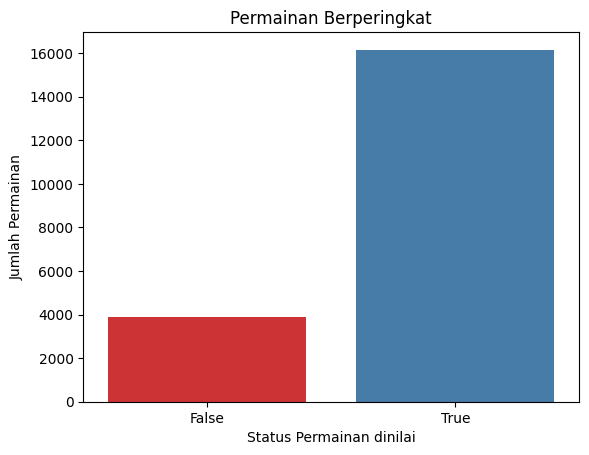

In [ ]:
sns.countplot(x = df['rated'], palette = 'Set1')
plt.title ("Permainan Berperingkat")
plt.xlabel("Status Permainan dinilai")
plt.ylabel("Jumlah Permainan")

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa mayoritas permainan catur daring menggunakan sistem penilaian (rated).

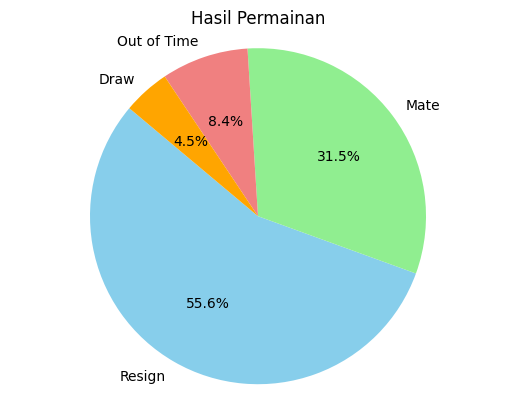

In [ ]:
victory_status_counts = df['victory_status'].value_counts()

victory_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Hasil Permainan')
plt.ylabel('')
plt.axis('equal')
plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa mayoritas hasil permainan yang dicapai dalam permainan catur daring adalah dengan cara menyerah, diikuti oleh skak mat, kehabisan waktu, dan yang paling jarang terjadi adalah hasil draw.

Text(0, 0.5, 'Jumlah pemain putih')

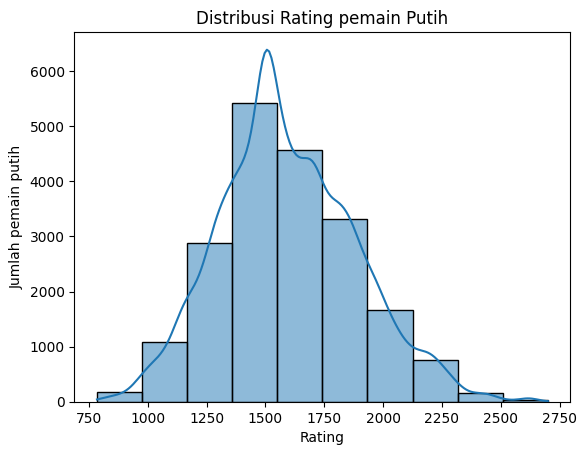

In [ ]:
sns.histplot(df['white_rating'].dropna(), bins=10, kde = True)
plt.title('Distribusi Rating pemain Putih')
plt.xlabel("Rating")
plt.ylabel("Jumlah pemain putih")

Berdasarkan Visualisasi diatas distribusi rating pemain putih normal.

Text(0, 0.5, 'Jumlah pemain Hitam')

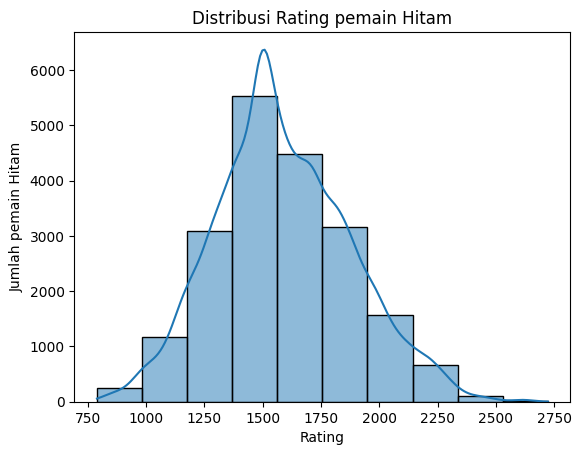

In [ ]:
sns.histplot(df['black_rating'].dropna(), bins=10, kde = True)
plt.title('Distribusi Rating pemain Hitam')
plt.xlabel("Rating")
plt.ylabel("Jumlah pemain Hitam")

Berdasarkan Visualisasi diatas distribusi rating pemain hitam normal.

<Axes: >

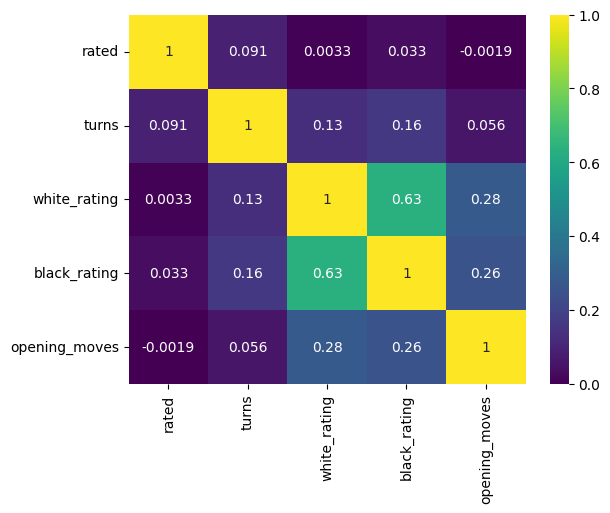

In [ ]:
sns.heatmap(data = df[['rated', 'turns',  'white_rating', 'black_rating', 'opening_moves']].corr(),
            annot = True,
            cmap= 'viridis')


Terdapat korelasi antara rating pemain putih dan rating pemain hitam sebesar 0.63. Hal ini dianggap wajar karena dalam permainan catur, pemain cenderung bertemu dengan lawan yang memiliki rating yang sama atau mirip.

##**Verify Data Quality**

####Missing Values

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
game_id,0.000000
rated,0.000000
turns,0.000000
victory_status,0.000000
winner,0.000000
time_increment,0.000000
white_id,0.000000
white_rating,0.000000
black_id,0.000000
black_rating,0.000000


Berdasarkan data diatas dapat disimpulkan bahwa Sebagian besar kolom (kecuali opening_response dan opening_variation) tidak memiliki nilai kosong sama sekali. Sedangkan Kolom opening_response memiliki sekitar 94% nilai kosong, yang menunjukkan bahwa sebagian besar entri dalam kolom tersebut tidak diisi dan Kolom opening_variation memiliki sekitar 28% nilai kosong, yang menunjukkan bahwa sebagian kecil entri dalam kolom tersebut tidak diisi.

####Outliers Values

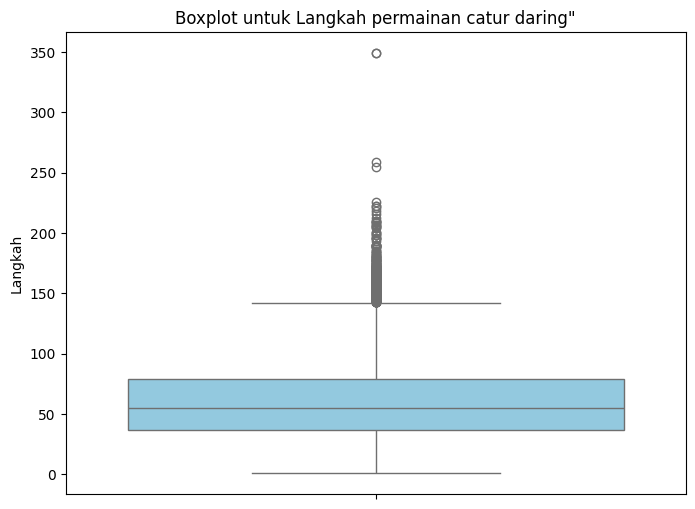

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['turns'], color='skyblue')
plt.title('Boxplot untuk Langkah permainan catur daring"')
plt.ylabel('Langkah')
plt.show()

Berdasarkan Visualisasi diatas dapat disimpulkan bahwa ada anomali atau outliers pada kolom turns dimana ada permainan catur daring yang mencapai kisaran 350 langkah.

####Duplicated Values

In [ ]:
df[df.duplicated()]

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation


berdasarkan data diatas bisa dilihat bahwa tidak ada duplikasi pada dataset ini.

####Inconsistent Values / Noise (Optional)

In [ ]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

# DATA CLEANING

## Penanganan Missing Values

### Pengecekkan Missing Values

In [ ]:
print((df.isna().sum() / len(df)) * 100)

game_id               0.000000
rated                 0.000000
turns                 0.000000
victory_status        0.000000
winner                0.000000
time_increment        0.000000
white_id              0.000000
white_rating          0.000000
black_id              0.000000
black_rating          0.000000
moves                 0.000000
opening_code          0.000000
opening_moves         0.000000
opening_fullname      0.000000
opening_shortname     0.000000
opening_response     93.982451
opening_variation    28.218167
dtype: float64


Bisa dilihat pada data diatas ada data yang kosong atau hilang pada kolom opening_response, dengan 93,98% data yang tidak terisi, dan pada kolom opening_variation, dengan 28,218% data yang tidak terisi.

In [ ]:
df[df['opening_response'].isnull()]

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,20054,True,24,Resign,White,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,2,Dutch Defense,Dutch Defense,NaN,NaN
20054,20055,True,82,Mate,Black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,2,Queen's Pawn,Queen's Pawn,NaN,NaN
20055,20056,True,35,Mate,White,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,NaN,Mason Attack
20056,20057,True,109,Resign,White,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,4,Pirc Defense,Pirc Defense,NaN,NaN


Nilai kosong pada kolom opening_response

In [ ]:
df[df['opening_variation'].isnull()]

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN
10,11,False,39,Mate,White,20+60,daniel_likes_chess,1381,anaissac,1272,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,A00,1,Van't Kruijs Opening,Van't Kruijs Opening,NaN,NaN
19,20,False,25,Resign,White,11+0,g-ios,1500,shivangithegenius,1094,d4 d5 h3 Nc6 Nf3 Nf6 Bg5 h6 Bxf6 exf6 e3 Bb4+ ...,D00,2,Queen's Pawn Game,Queen's Pawn Game,NaN,NaN
21,22,False,3,Resign,White,30+60,shivangithegenius,1094,themannichreaction,1068,d4 e6 Nc3,A40,2,Horwitz Defense,Horwitz Defense,NaN,NaN
28,29,True,53,Resign,Black,10+10,shivangithegenius,1056,biyanivedant01,1156,d4 d5 c4 c6 e3 dxc4 Bxc4 Nf6 Nc3 e6 e4 e5 d5 c...,D10,4,Slav Defense,Slav Defense,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20046,20047,True,36,Mate,Black,10+10,mateuslichess,1250,jamboger,1235,e4 d6 d4 Nf6 e5 dxe5 Be2 exd4 Nf3 Nc6 O-O e5 B...,B07,4,Pirc Defense,Pirc Defense,NaN,NaN
20052,20053,True,37,Resign,White,10+10,jamboger,1219,samael88,1250,c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...,A40,4,English Defense,English Defense,NaN,NaN
20053,20054,True,24,Resign,White,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,2,Dutch Defense,Dutch Defense,NaN,NaN
20054,20055,True,82,Mate,Black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,2,Queen's Pawn,Queen's Pawn,NaN,NaN


Nilai Kosong pada kolom opening_variation

### Hapus Missing Values

Karena presentase data kosong pada kolom opening_response lebih dari 70% yaitu 93.98% maka kolom harus dihapus

In [ ]:
df = df.drop('opening_response', axis=1)

In [ ]:
df

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,20054,True,24,Resign,White,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,2,Dutch Defense,Dutch Defense,NaN
20054,20055,True,82,Mate,Black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,2,Queen's Pawn,Queen's Pawn,NaN
20055,20056,True,35,Mate,White,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,Mason Attack
20056,20057,True,109,Resign,White,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,4,Pirc Defense,Pirc Defense,NaN


In [ ]:
df = df.drop('opening_variation', axis=1)

In [ ]:
df

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,20054,True,24,Resign,White,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,2,Dutch Defense,Dutch Defense
20054,20055,True,82,Mate,Black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,2,Queen's Pawn,Queen's Pawn
20055,20056,True,35,Mate,White,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game
20056,20057,True,109,Resign,White,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,4,Pirc Defense,Pirc Defense


Kolom 'opening_variation' dihapus karena meskipun hanya 28% dari data kosong, kolom ini tidak terlalu relevan dengan analisis yang ingin dilakukan. Oleh karena itu, daripada melakukan imputasi, lebih baik dihapus saja.

### Imputasi Missing Values

Dikarenakan semua nilai dalam kolom kosong telah dihapus, maka tidak diperlukan proses imputasi untuk mengisi nilai yang hilang.

### Pengecekan Ulang

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
game_id,0.0
rated,0.0
turns,0.0
victory_status,0.0
winner,0.0
time_increment,0.0
white_id,0.0
white_rating,0.0
black_id,0.0
black_rating,0.0


Bisa dilihat dari data di atas, tidak ada kolom yang kosong lagi.

## Penanganan Duplicated Values

### Pengecekan Nilai Duplikat

In [ ]:
df[df.duplicated()]

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname


Karena tidak ada duplikasi nilai dalam data, kita tidak perlu melakukan penanganan duplikat, sehingga kita bisa melanjutkan ke tahap berikutnya.

## Penanganan Outliers

### Pengecekkan Outliers

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
game_id,0.000000
turns,0.606215
white_rating,0.000000
black_rating,0.000000
opening_moves,4.477840


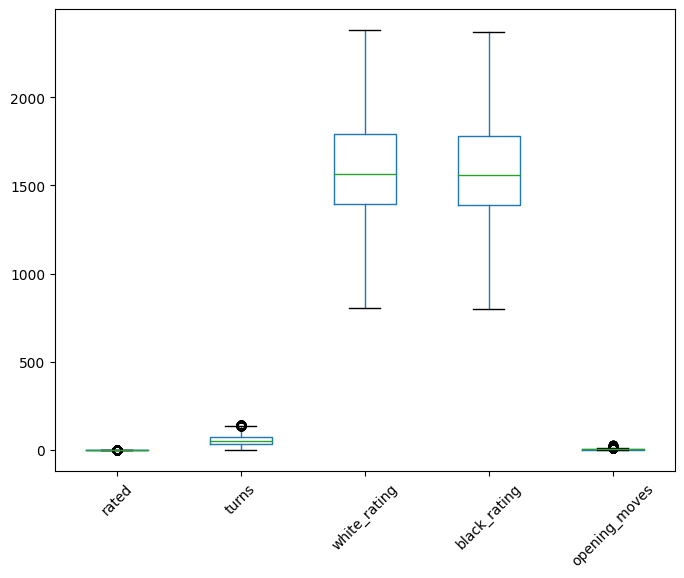

In [ ]:
boxplot = df.drop('game_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Bisa dilihat terdapat beberapa anomali pada beberapa kolom yang ada sehingga perlu dilakukan penghapusan dan imputasi outliers.

### Hapus Outliers

In [ ]:
Q1 = df['turns'].quantile(0.25)
Q3 = df['turns'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['turns'] >= lower_bound) & (df['turns'] <= upper_bound)]

Melakukan penghapusan baris pada kolom "Turns" untuk menangani outliers

### Imputasi Outliers

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "white_rating"

In [ ]:
Q1 = df['white_rating'].quantile(0.25)
Q3 = df['white_rating'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['white_rating']=np.where(df['white_rating']>upper_whisker,upper_whisker,np.where(df['white_rating']<lower_whisker,lower_whisker,df['white_rating']))

<ipython-input-35-803fd1ceac9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['white_rating']=np.where(df['white_rating']>upper_whisker,upper_whisker,np.where(df['white_rating']<lower_whisker,lower_whisker,df['white_rating']))


Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "black_rating"

In [ ]:
Q1 = df['black_rating'].quantile(0.25)
Q3 = df['black_rating'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['black_rating']=np.where(df['black_rating']>upper_whisker,upper_whisker,np.where(df['black_rating']<lower_whisker,lower_whisker,df['black_rating']))

<ipython-input-36-cd58222596f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['black_rating']=np.where(df['black_rating']>upper_whisker,upper_whisker,np.where(df['black_rating']<lower_whisker,lower_whisker,df['black_rating']))


### Pengecekkan Ulang

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
game_id,0.000000
turns,0.164010
white_rating,0.000000
black_rating,0.000000
opening_moves,4.469274


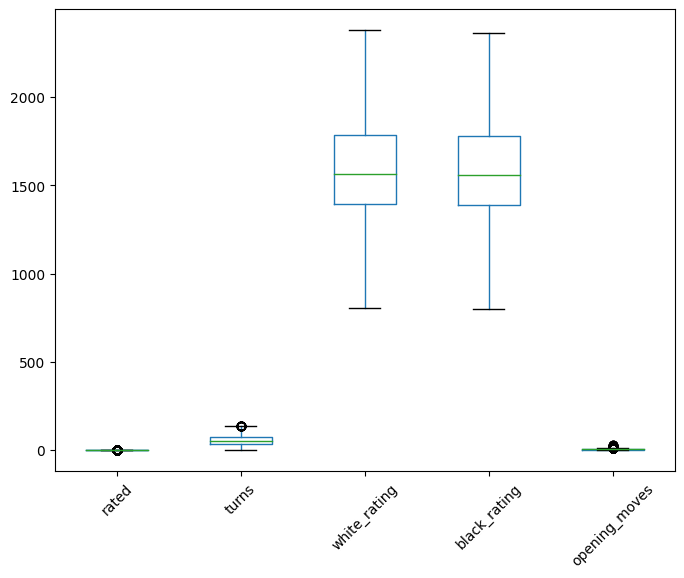

In [ ]:
boxplot = df.drop('game_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Setelah dilakukan penghapusan dan imputasi maka outliers pun sudah hilang.

# Construct Data

## Melakukan Rekayasa Fitur (Feature Engineering)

Disini saya menambahkan sebuah fitur baru bernama skill level untuk menentukan skill pemain dari sebuah permainan catur daring berdasarkan rata-rata rating kedua pemain.

In [ ]:
df['average_rating'] = (df['white_rating'] + df['black_rating'])/2
def find_skill(average_rating):
    if average_rating<=1200:
        return 'Beginner'
    elif 1200<average_rating and average_rating<=1800:
        return 'Intermediate'
    elif 1800<average_rating and average_rating<=2200:
        return 'Advanced'
    else:
        return 'Expert'

df['Skill level'] = df['average_rating'].apply(find_skill)

Disini saya juga mengubah status waktu pada permainan catur daring menjadi string agar lebih mudah dipakai ketika Data Transformation.

In [ ]:
df['time_increment'] = df['time_increment'].apply(lambda time: time.split('+')[0])
def categorizing_time(time):
    time = float(time)
    if 0 <= time and time <= 1:
        return "Bullet"
    if 1 < time and time < 10:
        return "Blitz"
    if 10 <= time and time <=60:
        return 'Rapid'
    return 'Classical'
df['game_type'] = df['time_increment'].apply(categorizing_time)

## Pengecekan Hasil

In [ ]:
df.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,average_rating,Skill level,game_type
0,1,False,13,Out of Time,White,15,bourgris,1500.0,a-00,1191.0,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,1345.5,Intermediate,Rapid
1,2,True,16,Resign,Black,5,a-00,1322.0,skinnerua,1261.0,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,1291.5,Intermediate,Blitz
2,3,True,61,Mate,White,5,ischia,1496.0,a-00,1500.0,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,1498.0,Intermediate,Blitz
3,4,True,61,Mate,White,20,daniamurashov,1439.0,adivanov2009,1454.0,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,1446.5,Intermediate,Rapid
4,5,True,95,Mate,White,30,nik221107,1523.0,adivanov2009,1469.0,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,1496.0,Intermediate,Rapid


Bisa dilihat terdapat kolom baru yaitu skill level dan isi kolom time_increment yang terubah menjadi string

#Data Reduction

## Mengurangi fitur yang kurang relevan

Disini kita mengecek kolom apa aja yang kurang relevan untuk analisa kita.

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

Disini kita menghapus kolom kolom yang tidak relevan dengan analisis kita, disini ada 8 kolom yang saya hapus yaitu game_id, white_id, black_id, moves,opening_moves, opening_code, opening_fullname dan time_increment.

In [ ]:
df = df.drop(['game_id','white_id', 'black_id','moves','opening_moves','opening_code','opening_fullname','time_increment'], axis = 1)

## Pengecekkan Hasil

In [ ]:
df.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_shortname,average_rating,Skill level,game_type
0,False,13,Out of Time,White,1500.0,1191.0,Slav Defense,1345.5,Intermediate,Rapid
1,True,16,Resign,Black,1322.0,1261.0,Nimzowitsch Defense,1291.5,Intermediate,Blitz
2,True,61,Mate,White,1496.0,1500.0,King's Pawn Game,1498.0,Intermediate,Blitz
3,True,61,Mate,White,1439.0,1454.0,Queen's Pawn Game,1446.5,Intermediate,Rapid
4,True,95,Mate,White,1523.0,1469.0,Philidor Defense,1496.0,Intermediate,Rapid


Bisa dilihat 8 kolom yang saya hapus sudah tidak ada lagi di data sekarang.

# Data Transformation

## Mapping

Disini saya melakukan mapping ke 4 kolom agar kolom tersebut bisa terbaca karena diubah ke interger. Kolom yang diubah adalah victory_status, time_increment, skill_level dan winner.

In [ ]:
df['victory_status'] = df['victory_status'].map({'Resign':0,'Out of Time':1, 'Mate':2, 'Draw': 3}).astype(int)
df['game_type'] = df['game_type'].map({'Bullet': 0, 'Blitz': 1,'Rapid': 2, 'Classical': 3}).astype(int)
df['Skill level'] = df['Skill level'].map({'Beginner': 0, 'Intermediate': 1,'Advanced': 2, 'Expert': 3}).astype(int)
df['winner'] = df['winner'].map({'Draw':2,'White':1,'Black':0}).astype(int)

In [ ]:
df

,rated,turns,victory_status,winner,white_rating,black_rating,opening_shortname,average_rating,Skill level,game_type
0,False,13,1,1.0,1500.0,1191.0,Slav Defense,1345.5,1,2
1,True,16,0,0.0,1322.0,1261.0,Nimzowitsch Defense,1291.5,1,1
2,True,61,2,1.0,1496.0,1500.0,King's Pawn Game,1498.0,1,1
3,True,61,2,1.0,1439.0,1454.0,Queen's Pawn Game,1446.5,1,2
4,True,95,2,1.0,1523.0,1469.0,Philidor Defense,1496.0,1,2
...,...,...,...,...,...,...,...,...,...,...
20053,True,24,0,1.0,1691.0,1220.0,Dutch Defense,1455.5,1,2
20054,True,82,2,0.0,1233.0,1196.0,Queen's Pawn,1214.5,1,2
20055,True,35,2,1.0,1219.0,1286.0,Queen's Pawn Game,1252.5,1,2
20056,True,109,0,1.0,1360.0,1227.0,Pirc Defense,1293.5,1,2


## Encoding

Disini saya melakukan Encoding yaitu mengubah semua kolom kategorikal (kolom opening shortname) menjadi Numerik (biner).

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df

,rated,turns,victory_status,winner,white_rating,black_rating,average_rating,Skill level,game_type,opening_shortname_Alekhine Defense,...,opening_shortname_Trompowsky Attack,opening_shortname_Valencia Opening,opening_shortname_Van Geet Opening,opening_shortname_Van't Kruijs Opening,opening_shortname_Vienna Game,opening_shortname_Wade Defense,opening_shortname_Ware Defense,opening_shortname_Ware Opening,opening_shortname_Yusupov-Rubinstein System,opening_shortname_Zukertort Opening
0,False,13,1,1.0,1500.0,1191.0,1345.5,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1,True,16,0,0.0,1322.0,1261.0,1291.5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,True,61,2,1.0,1496.0,1500.0,1498.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,True,61,2,1.0,1439.0,1454.0,1446.5,1,2,0,...,0,0,0,0,0,0,0,0,0,0
4,True,95,2,1.0,1523.0,1469.0,1496.0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,24,0,1.0,1691.0,1220.0,1455.5,1,2,0,...,0,0,0,0,0,0,0,0,0,0
20054,True,82,2,0.0,1233.0,1196.0,1214.5,1,2,0,...,0,0,0,0,0,0,0,0,0,0
20055,True,35,2,1.0,1219.0,1286.0,1252.5,1,2,0,...,0,0,0,0,0,0,0,0,0,0
20056,True,109,0,1.0,1360.0,1227.0,1293.5,1,2,0,...,0,0,0,0,0,0,0,0,0,0


# Select Modeling Techniques


Saya memilih untuk menggunakan kombinasi algoritma prediktif karena fokus utama dataset saya adalah untuk melakukan prediksi. Dengan menggunakan model prediktif, kita dapat menghasilkan prediksi yang akurat tentang siapa yang akan menang dalam permainan catur daring berdasarkan faktor-faktor yang ada dalam dataset.

Dalam dataset ini, terdapat berbagai informasi yang dapat digunakan untuk memprediksi hasil permainan, seperti rating pemain, jenis pembukaan permainan, dan sebagainya. Model prediktif memungkinkan kita untuk memanfaatkan informasi ini secara efektif untuk membuat prediksi yang akurat.

Naive Bayes:

Algoritma Naive Bayes cocok digunakan karena dapat menangani fitur-fitur independen seperti rating pemain dan jenis pembukaan. Dengan demikian, kita dapat memprediksi hasil permainan berdasarkan kombinasi fitur ini dengan probabilitas yang tinggi.

K Nearest Neighbors (KNN):

KNN dapat digunakan untuk menemukan pola-pola tersembunyi dalam data dengan mempertimbangkan kemiripan antara permainan yang ada dalam dataset. Ini memungkinkan untuk memberikan prediksi berdasarkan pola permainan yang serupa sebelumnya.

Decision Trees:

Decision Trees akan membantu memahami hubungan antara fitur-fitur tersebut dan hasil permainan dengan memetakan aturan keputusan berdasarkan karakteristik permainan. Dengan demikian, kita dapat memperoleh wawasan yang lebih dalam tentang faktor-faktor apa yang memengaruhi kemenangan atau kekalahan dalam permainan catur.

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [ ]:
df = pd.read_csv('Data_Cleaned.csv')

In [ ]:
df.head()

,rated,turns,victory_status,winner,white_rating,black_rating,average_rating,Skill level,game_type,opening_shortname_Alekhine Defense,...,opening_shortname_Trompowsky Attack,opening_shortname_Valencia Opening,opening_shortname_Van Geet Opening,opening_shortname_Van't Kruijs Opening,opening_shortname_Vienna Game,opening_shortname_Wade Defense,opening_shortname_Ware Defense,opening_shortname_Ware Opening,opening_shortname_Yusupov-Rubinstein System,opening_shortname_Zukertort Opening
0,False,13,1,1,1500.0,1191.0,1345.5,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1,True,16,0,0,1322.0,1261.0,1291.5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,True,61,2,1,1496.0,1500.0,1498.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,True,61,2,1,1439.0,1454.0,1446.5,1,2,0,...,0,0,0,0,0,0,0,0,0,0
4,True,95,2,1,1523.0,1469.0,1496.0,1,2,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling Predict

## Pre Processing

### Split Data

In [ ]:
x = df.drop('winner', axis=1)
y = df['winner']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Langkah pertama adalah melakukan splitting data dengan membuat variabel x, yang berisi dataset kecuali kolom 'winner', dan variabel y, yang hanya berisi kolom 'winner'. Selanjutnya, dataset dibagi menjadi data latih dan data uji menggunakan fungsi train_test_split dari library scikit-learn. Data uji akan memiliki ukuran sebesar 20% dari keseluruhan dataset, sedangkan data latih akan menjadi 80%.

### Normalisasi Data

In [ ]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Langkah selanjutnya adalah melakukan normalisasi data  untuk mengubah skala nilai-nilai dalam dataset sehingga setiap fitur memiliki kontribusi yang seimbang terhadap analisis atau pemodelan yang akan dilakukan.

##**Build and Train Model**

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()


Kode diatas membuat dan melatih model klasifikasi Naive Bayes Gaussian dengan data latih yang telah dinormalisasi. Algoritma Naive Bayes Gaussian menggunakan distribusi Gaussian untuk menghitung probabilitas kelas yang paling mungkin berdasarkan nilai fitur yang diberikan, dengan asumsi independensi antara fitur-fitur.

### K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Kode diatas membuat dan melatih model klasifikasi K-Nearest Neighbors (KNN) dengan data latih yang telah dinormalisasi. Dalam algoritma KNN, prediksi kelas suatu data baru didasarkan pada mayoritas kelas dari K tetangga terdekatnya dalam ruang fitur.

### Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Kode diatas membuat dan melatih model klasifikasi Decision Tree dengan data latih yang telah dinormalisasi. Algoritma Decision Tree membangun struktur pohon keputusan berdasarkan fitur-fitur pada data latih untuk memprediksi kelas target.

# Begins And Compare Predict

In [ ]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [ ]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [ ]:
combined_data.sample(10)

,rated,turns,victory_status,white_rating,black_rating,average_rating,Skill level,game_type,opening_shortname_Alekhine Defense,opening_shortname_Amar Opening,...,opening_shortname_Vienna Game,opening_shortname_Wade Defense,opening_shortname_Ware Defense,opening_shortname_Ware Opening,opening_shortname_Yusupov-Rubinstein System,opening_shortname_Zukertort Opening,winner,gnb_prediction,knn_prediction,dtc_prediction
2476,True,56,0,1716.0,1768.0,1742.0,1,2,0,0,...,0,0,0,0,0,0,0,2,1,0
1354,True,43,0,1607.0,1500.0,1553.5,1,2,0,0,...,0,0,0,0,0,0,0,0,0,1
920,False,88,2,1500.0,1769.0,1634.5,1,2,0,0,...,0,0,0,0,0,0,0,2,0,1
1883,True,36,0,1428.0,1222.0,1325.0,1,2,0,0,...,0,0,0,0,0,0,0,2,1,1
3085,True,41,1,1887.0,1699.0,1793.0,1,2,0,0,...,0,0,0,0,0,0,1,2,1,1
3517,True,103,2,2137.0,1944.0,2040.5,2,2,0,0,...,0,0,0,0,0,0,1,2,1,1
480,True,47,2,1948.0,1397.0,1672.5,1,2,0,0,...,0,0,0,0,0,0,1,2,1,1
3858,True,72,2,1268.0,1392.0,1330.0,1,2,0,0,...,0,0,0,0,0,0,0,2,1,1
285,True,111,2,1694.0,1763.0,1728.5,1,2,0,0,...,0,0,0,0,0,0,1,2,0,0
2721,False,30,0,1804.0,1954.0,1879.0,2,2,0,0,...,0,0,0,0,0,0,1,2,0,0



Kode ini melakukan prediksi kelas target menggunakan tiga model klasifikasi yang telah dilatih sebelumnya: Naive Bayes Gaussian (gnb), K-Nearest Neighbors (knn), dan Decision Tree (dtc). Hasil prediksi kemudian disatukan dalam satu DataFrame untuk evaluasi performa model.

# Evaluation

##**Evaluate Results**

### Klasifikasi

Confusion Matrix

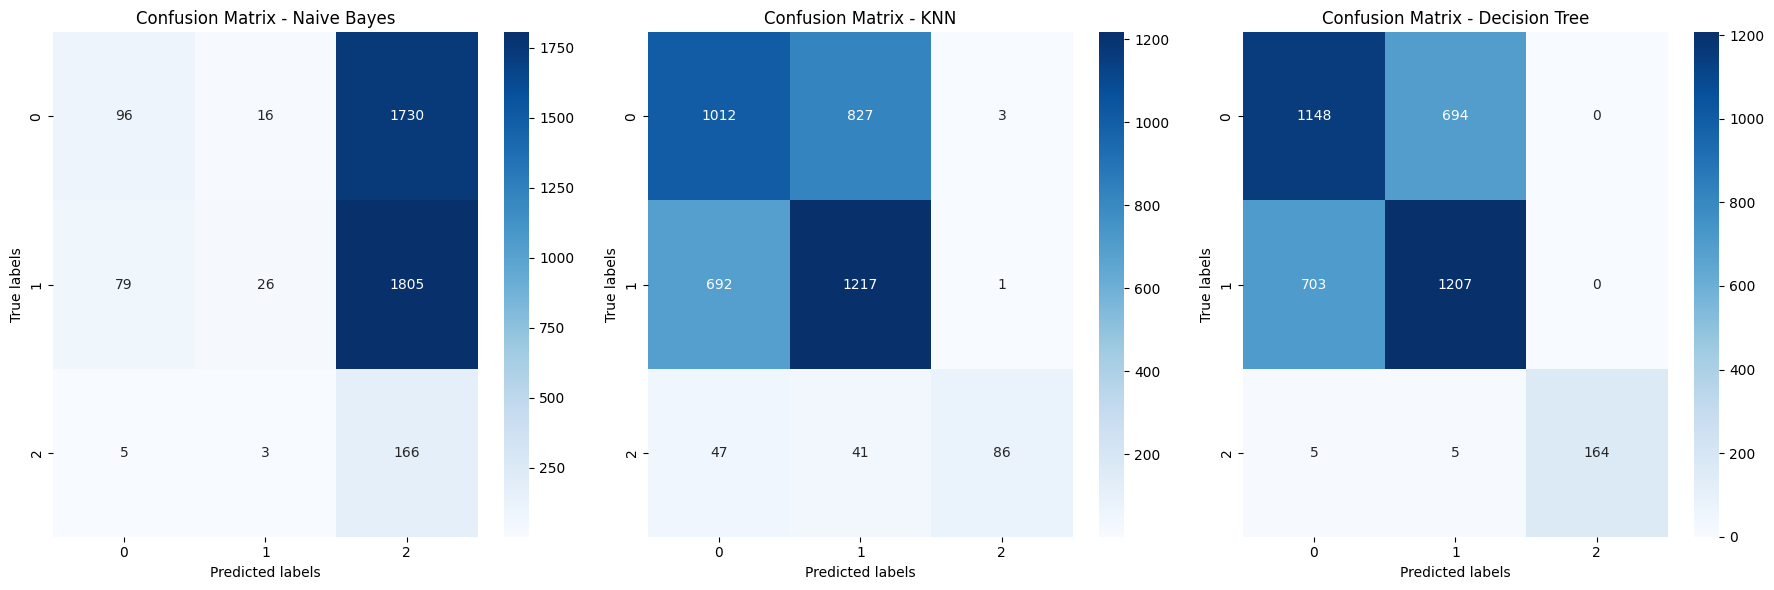

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = [gnb_pred, knn_pred, dtc_pred]
models = ["Naive Bayes", "KNN", "Decision Tree"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, pred in enumerate(predictions):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {models[i]}')
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')

plt.tight_layout()
plt.show()


Berdasarkan confusion matrix di atas, dapat diamati bahwa Naive Bayes memiliki jumlah prediksi yang salah yang signifikan. Prediksi yang benar hanya sekitar 290, sementara mayoritasnya salah. Sementara itu, KNN menunjukkan kinerja yang lebih baik dengan sekitar 2315 prediksi yang benar. Terakhir, Decision Tree menunjukkan tingkat akurasi yang paling tinggi dengan 2519 prediksi yang benar.

In [ ]:
from sklearn.metrics import confusion_matrix


def calculate_metrics(cm):
    tn, fp, fn, tp, _, _ = cm.ravel()[:6]
    accuracy = (tp + tn) / (tn + fp + fn + tp)

    if (tp + fp) == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)

    if (tp + fn) == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)

    if (precision + recall) == 0:
        f1 = 0
    else:
        f1 = (2 * precision * recall) / (precision + recall)

    return accuracy, precision, recall, f1


predictions = [gnb_pred, knn_pred, dtc_pred]
models = ["Naive Bayes", "KNN", "Decision Tree"]

for i, pred in enumerate(predictions):
    cm = confusion_matrix(y_test, pred)

    accuracy, precision, recall, f1 = calculate_metrics(cm)

    print(f"\nMetrics for {models[i]}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")



Metrics for Naive Bayes:
Accuracy: 0.09
Precision: 0.83
Recall: 0.04
F1-score: 0.08

Metrics for KNN:
Accuracy: 0.67
Precision: 0.46
Recall: 1.00
F1-score: 0.63

Metrics for Decision Tree:
Accuracy: 0.73
Precision: 0.50
Recall: 1.00
F1-score: 0.67



Berdasarkan metrics yang diberikan, terlihat perbedaan signifikan dalam performa ketiga algoritma.

Naive Bayes memiliki akurasi rendah (0.09), namun memiliki tingkat precision yang tinggi (0.83), tetapi recall dan F1-score yang rendah (masing-masing 0.04 dan 0.08). Ini menunjukkan kemungkinan Naive Bayes mengidentifikasi sebagian besar prediksi dengan benar, tetapi sering kali melewatkan prediksi positif.

KNN memiliki akurasi yang lebih baik (0.67), dengan recall sempurna (1.00), tetapi precision yang rendah (0.46). Hal ini menunjukkan KNN cenderung menghasilkan banyak prediksi positif, tetapi juga menghasilkan banyak prediksi yang salah.

Sementara itu, Decision Tree memiliki akurasi tertinggi (0.73) dengan recall sempurna (1.00), dan precision yang sedikit lebih rendah (0.50). Decision Tree mampu menjaga keseimbangan antara precision dan recall dengan baik, menghasilkan prediksi yang akurat dan komprehensif.

ROC/AUC

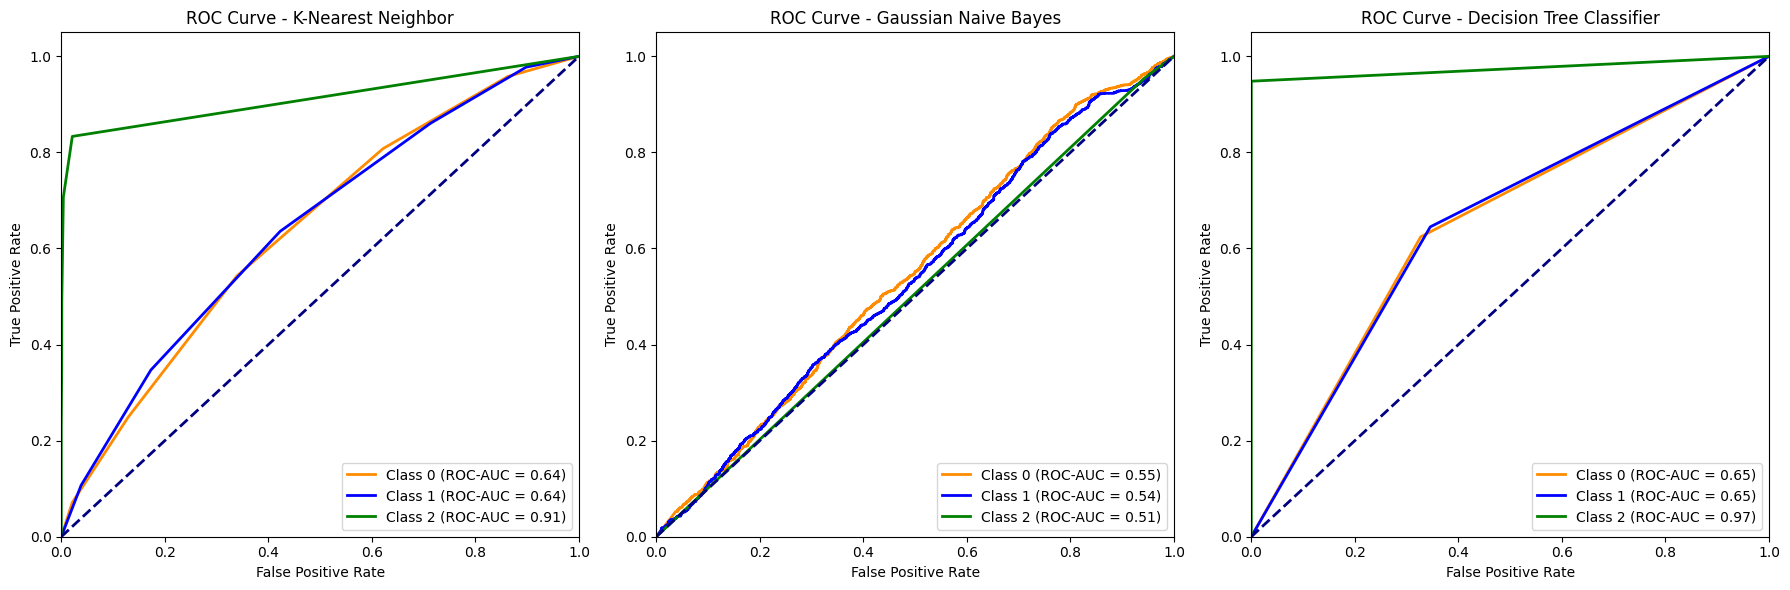

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_score = model.predict_proba(x_test_norm)
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(np.unique(y_test))):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = ['darkorange', 'blue', 'green']
    for i in range(len(np.unique(y_test))):
        ax.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (ROC-AUC = {roc_auc[i]:.2f})')

    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()


Grafik diatas menunjukkan performa tiga model klasifikasi, yaitu K-Nearest Neighbor (KNN), Gaussian Naive Bayes (GNB), dan Decision Tree Classifier (DTC), dalam membedakan kelas positif dan negatif.

DTC memiliki performa terbaik dengan AUC 0,65, diikuti oleh KNN dengan AUC 0,64, dan GNB dengan AUC 0,55. Hal ini menunjukkan bahwa DTC mampu membedakan kelas dengan lebih baik dibandingkan KNN dan GNB. Namun, secara keseluruhan, performa ketiga model klasifikasi masih tergolong moderat.

# Review Process

## Validasi Silang

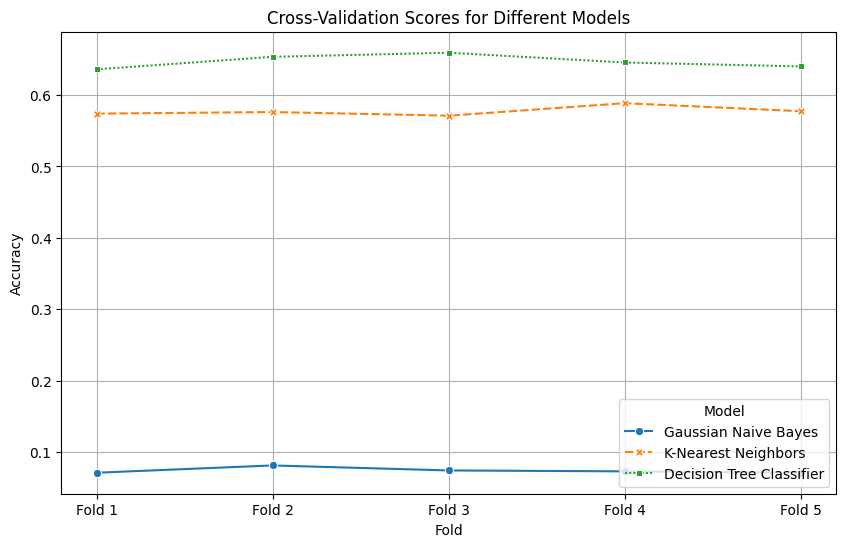

In [ ]:
from sklearn.model_selection import cross_val_score


models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()


Dalam visualisasi tersebut, setiap garis mewakili akurasi dari setiap lipatan dalam validasi silang. Garis Decision Tree memiliki akurasi yang konsisten tinggi di setiap lipatan, diikuti oleh KNN yang memiliki variasi sedikit lebih besar dalam akurasi. Naive Bayes menunjukkan akurasi yang lebih rendah secara konsisten di setiap lipatan. Dengan demikian, urutan performa terbaik adalah:

1. Decision Tree Classifier (DT)
2. K-Nearest Neighbors (KNN)
3. Gaussian Naive Bayes (GNB)

## Feature Selection

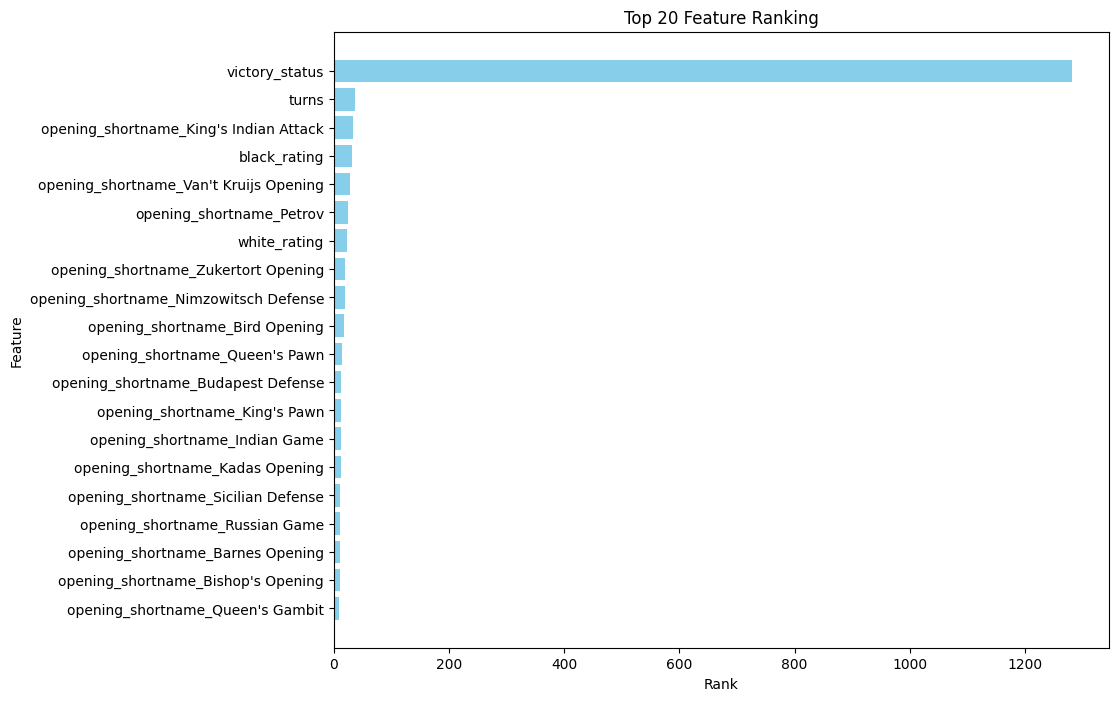

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=20)

selector.fit(x_train_norm, y_train)


feature_ranks = selector.scores_


feature_names = x_train.columns


feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})


feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)


top_features = feature_ranks_df.head(20)


plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Top 20 Feature Ranking')
plt.gca().invert_yaxis()
plt.show()


ini adalah diagram batang yang menunjukkan seberapa penting sebuah kolom dalam pelatihan pemodelan, dikarenakan dataset saya ada banyak kolom nya maka saya hanya akan melihatkan 20 kolom terpenting untuk latihan model. Bisa dilihat kolom terpenting untuk pelatihan permodelan yaitu victory_status.

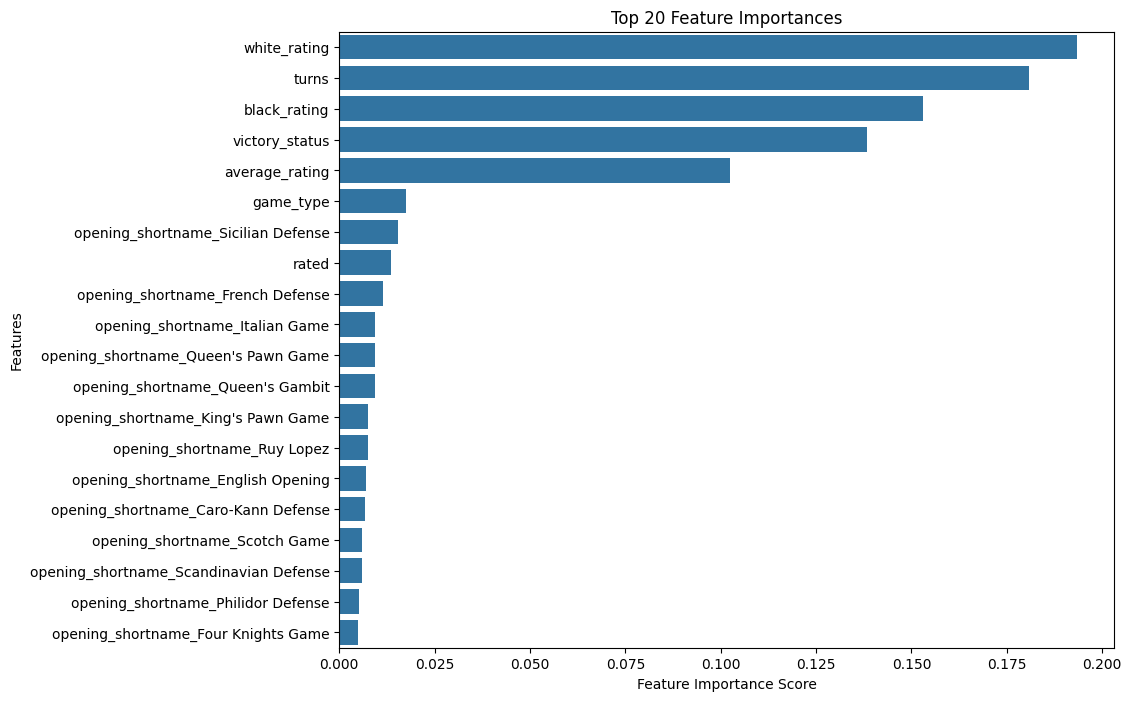

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

top_20_feature_imp = feature_imp.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_feature_imp, y=top_20_feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances')
plt.show()


ini adalah diagram batang untuk model decision tree yang menunjukkan seberapa penting sebuah kolom dalam pelatihan pemodelan, dikarenakan dataset saya ada banyak kolom nya maka saya hanya akan melihatkan 20 kolom terpenting untuk latihan model

dari terpenting sampai tidak terpenting
1. white_rating (peringkat putih)
2. turns (giliran)
3. black_rating (peringkat hitam)
4. victory_status (status kemenangan)
5. average_rating (peringkat rata-rata)
6. game_type (tipe permainan)

## Tuning Hyperparamater

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.43287612810830584}
Akurasi sebelum tuning: 0.07335710646968925
Akurasi setelah tuning: 0.5636780438104941



Setelah melakukan tuning, terdapat peningkatan signifikan dalam kinerja model Naive Bayes Gaussian (GaussianNB). Sebelum tuning, akurasi model hanya sekitar 7.34%, namun setelah tuning, akurasi meningkat drastis menjadi sekitar 56.37%. Hal ini menunjukkan bahwa dengan penyesuaian parameter yang tepat, model dapat melakukan prediksi dengan akurasi yang jauh lebih baik.

In [ ]:
gnb = GaussianNB(var_smoothing=0.43287612810830584)

Karena hasil tuning nya baik maka kita terapkan hasil tuning tersebut

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


dtc = DecisionTreeClassifier()


acc_before_tuning = dtc.fit(x_train_norm, y_train).score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_model = grid_search.best_estimator_

acc_after_tuning = best_model.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Akurasi sebelum tuning: 0.6451859398879266
Parameter terbaik: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Akurasi setelah tuning: 0.65206316861946



Setelah melakukan tuning parameter untuk model Decision Tree Classifier (DTC). Setelah melakukan pencarian grid terhadap berbagai kombinasi parameter yang mungkin, parameter terbaik yang ditemukan untuk model DTC adalah sebagai berikut:

1. Kriteria pemilihan split node (criterion): 'entropy'
2. Kedalaman maksimum pohon (max_depth): 10
3. Jumlah minimum sampel yang dibutuhkan untuk membagi node internal (min_samples_split): 5
4. Jumlah minimum sampel yang diperlukan untuk menjadi leaf node (min_samples_leaf): 4
5. Jumlah fitur yang dipertimbangkan saat mencari split terbaik (max_features): None

Sebelum dilakukan tuning, akurasi model DTC sekitar 64.52%. Namun, setelah tuning parameter, akurasi model meningkat menjadi sekitar 65.21%. Dengan demikian, tuning parameter berhasil meningkatkan kinerja model DTC, sehingga meningkatkan kemampuannya dalam melakukan prediksi data.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint


param_dist = {
    'n_neighbors': randint(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)

random_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", random_search.best_params_)


knn_default = KNeighborsClassifier()
knn_default.fit(x_train_norm, y_train)
y_pred_before_tuning = knn_default.predict(x_test_norm)
acc_before_tuning = accuracy_score(y_test, y_pred_before_tuning)
print("Akurasi sebelum tuning:", acc_before_tuning)


acc_after_tuning = random_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'n_neighbors': 12, 'p': 1, 'weights': 'distance'}
Akurasi sebelum tuning: 0.5896586856851758
Akurasi setelah tuning: 0.6100356597045339


Setelah melakukan tuning parameter untuk model K-Nearest Neighbors (KNN), ditemukan parameter terbaik yang optimal untuk model. Parameter terbaik yang ditemukan adalah sebagai berikut:

Jumlah tetangga terbaik
1. (n_neighbors): 12
2. Metode pembobotan (weights): 'distance'
3. Parameter p untuk metrik Minkowski (p): 1 (Manhattan distance)

Sebelum dilakukan tuning, akurasi model KNN sekitar 58.97%. Namun, setelah tuning parameter, akurasi model meningkat menjadi sekitar 61.00%. Dengan demikian, tuning parameter berhasil meningkatkan kinerja model KNN, sehingga meningkatkan kemampuannya dalam melakukan prediksi data.








# Determine Next Steps

Berdasarkan hasil evaluasi yang telah dilakukan, kita memiliki informasi terkait performa dari tiga algoritma klasifikasi yang berbeda, yaitu Gaussian Naive Bayes (GNB), K Nearest Neighbor (KNN), dan Decision Tree Classifier (DTC), setelah dilakukan tuning parameter.

- Gaussian Naive Bayes memiliki akurasi yang rendah sebesar 56.37% setelah tuning, namun memiliki precision yang cukup tinggi sebesar 0.83. Meskipun demikian, recall dan F1-score yang rendah menunjukkan bahwa model ini cenderung memberikan banyak false negatives.

- K Nearest Neighbor menunjukkan peningkatan akurasi dari 58.97% sebelum tuning menjadi 61.00% setelah tuning. Namun, meskipun memiliki recall sempurna (1.00), precision dan F1-score yang rendah menunjukkan bahwa model ini mungkin cenderung memberikan banyak false positives.

- Decision Tree Classifier menunjukkan performa yang cukup baik setelah tuning, dengan akurasi sebesar 65.21%. Selain itu, precision, recall, dan F1-score yang tinggi (masing-masing sebesar 0.50, 1.00, dan 0.67) menunjukkan bahwa model ini memiliki keseimbangan yang baik antara kemampuan untuk mengidentifikasi true positives dan true negatives.

Berdasarkan informasi tersebut, algoritma terbaik untuk digunakan adalah Decision Tree Classifier (DTC), karena memiliki akurasi yang tinggi serta precision, recall, dan F1-score yang baik pula. Oleh karena itu, langkah selanjutnya adalah melanjutkan dengan tahap deployment menggunakan model Decision Tree Classifier.